In [1]:
import pandas as pd

# Google API
from googleapiclient.discovery import build

# Provides functions for working with JSON data
import json
from IPython.display import display, JSON

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker       # Provides various classes and functions that help customize and control the formatting of tick locations and labels on plot axes

# Natural Language Processing libraries
import nltk
from nltk.corpus import stopwords        # Contains a list of common words that are often irrelevant (e.g., "the", "is", "and")
from nltk.tokenize import word_tokenize  # Used to split a text or sentence into individual words or tokens
nltk.download('stopwords')               # Downloads the stopwords list
nltk.download('punkt')                   # Downloads the tokenizer resources
from wordcloud import WordCloud          # Used to generate word clouds, which are visual representations of the most frequent words in a given text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALEX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ALEX\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Creating Data with the YouTube API
First, I created a project on the Google Developers Console and requested an authorization credential (API key). After that, I enabled the YouTube API for my application, allowing me to send API requests to YouTube API services. Then, I visited YouTube and retrieved the channel ID that I wanted to include. Then, I created the functions for getting the channel statistics via the API.

In [3]:
# Install library to interact with Google APIs
pip install --upgrade google-api-python-client

SyntaxError: invalid syntax (1258166375.py, line 2)

In [4]:
# Manchester United channel id
channel_id = ['UC6yW44UGJJBvYTlfC7CRg2Q']

In [5]:
api_service_name = "youtube"
api_version = "v3"

youtube = build(api_service_name, api_version, developerKey=api_key)

# This request aims to retrieve information about specific YouTube channels
request = youtube.channels().list(
    part="snippet,contentDetails,statistics",
    id=','.join(channel_id)
)
response = request.execute()

# Used to print the response in a formatted JSON representation
print(json.dumps(response, indent=4))

{
    "kind": "youtube#channelListResponse",
    "etag": "ZUEhL7Ubc5Yx2omVKXUjJM5lTKE",
    "pageInfo": {
        "totalResults": 1,
        "resultsPerPage": 5
    },
    "items": [
        {
            "kind": "youtube#channel",
            "etag": "LFRBRC-rt0eH8NPAD4ofo34Vt3E",
            "id": "UC6yW44UGJJBvYTlfC7CRg2Q",
            "snippet": {
                "title": "Manchester United",
                "description": "This is the official YouTube channel of Manchester United.\n\nSubscribe for free now and we'll bring you unique behind-the-scenes access to Old Trafford and Carrington, exclusive player features and all the latest goals and match action.\n\nWe'll also open the doors to our world-renowned Academy, and take a look back at the legendary players and classic matches that made Manchester United the greatest football club in the world!",
                "customUrl": "@manutd",
                "publishedAt": "2017-12-19T13:21:04Z",
                "thumbnails": {
      

In [6]:
# Retrieves statistics for a list of YouTube channels using the YouTube API
def get_channel_stats(youtube, channel_id):
    
    # Created empty list to store the statistics
    all_data = []

    request = youtube.channels().list(              # Called to construct an API request
        part="snippet,contentDetails,statistics",   # To specify the desired information about the channel
        id=','.join(channel_id)                     # To join the channel IDs into a comma-separated string
    )
    response = request.execute()

    # Loop through items
    for item in response['items']:
        data = {'ChannelName': item['snippet']['title'],
               'Subscribers': item['statistics']['subscriberCount'],
               'Views': item['statistics']['viewCount'],
               'TotalVideos': item['statistics']['videoCount'],
               'PlaylistId': item['contentDetails']['relatedPlaylists']['uploads']
        }
        
        all_data.append(data)
        
    # Create DataFrame
    return(pd.DataFrame(all_data))

In [7]:
channel_stats = get_channel_stats(youtube, channel_id)

In [8]:
channel_stats

,ChannelName,Subscribers,Views,TotalVideos,PlaylistId
0,Manchester United,7760000,1614103926,3378,UU6yW44UGJJBvYTlfC7CRg2Q


In [9]:
# Manchester United playlist id
playlist_id = 'UU6yW44UGJJBvYTlfC7CRg2Q'

In [10]:
# This request aims to retrieve the items in a specific playlist
request = youtube.playlistItems().list(
    part="snippet, contentDetails",
    playlistId="UU6yW44UGJJBvYTlfC7CRg2Q"
)
response = request.execute()
# Used to print the response in a formatted JSON representation
print(json.dumps(response, indent=4))

{
    "kind": "youtube#playlistItemListResponse",
    "etag": "3fbNafhUyUw8PhwLu1EmR7YmTW8",
    "nextPageToken": "EAAaBlBUOkNBVQ",
    "items": [
        {
            "kind": "youtube#playlistItem",
            "etag": "2K3JiLRg8VpGbitz3eBjqNroAo8",
            "id": "VVU2eVc0NFVHSkpCdllUbGZDN0NSZzJRLjFyZFk0dXphMDJZ",
            "snippet": {
                "publishedAt": "2023-06-01T14:00:02Z",
                "channelId": "UC6yW44UGJJBvYTlfC7CRg2Q",
                "title": "A MUST-WATCH Speech From Erik! \ud83d\udce3 | Addressing Old Trafford",
                "description": "Watch Erik ten Hag's inspiring speech in full as he speaks to fans after the final home game of 2022/23.\n\n\u25b6\ufe0f Subscribe to Manchester United on YouTube at http://bit.ly/ManU_YT\n\ud83d\udcf2 Download the Man Utd app: http://manutd.co/F4c\n\ud83d\udcbb Visit Manchester United: http://www.manutd.com\n\ud83d\uded2 Shop your favourite United attire: https://bit.ly/3s9uTW7\n\n#MUFC",
                "t

In [11]:
# Retrieves the video IDs from a YouTube playlist using the YouTube API
def get_video_ids(youtube, playlist_id):
    
    # Created empty list to store the video IDs
    video_ids = []

    request = youtube.playlistItems().list(     # Called to construct an API request 
        part="snippet,contentDetails",          # To specify the desired information about each playlist item
        playlistId=playlist_id,
        maxResults = 50                         # Set limit the nuuid.inimber of results per page
    )
    response = request.execute()

    # For each playlist item, the corresponding video ID is extracted from item['contentDetails']['videoId'] and appended to the video_ids list
    for item in response['items']:
        video_ids.append(item['contentDetails']['videoId'])
        
    # Used to paginate through the playlist items when there are more items available than the maxResults specified
    next_page_token = response.get('nextPageToken')
    while next_page_token is not None:              # Used to continue fetching more pages of playlist items until there are no more pages
        request = youtube.playlistItems().list(
            part="snippet,contentDetails",
            playlistId=playlist_id,
            maxResults = 50,
            pageToken = next_page_token
        )
    
        response = request.execute()

        # Loop through items again
        for item in response['items']:
            video_ids.append(item['contentDetails']['videoId'])
    
        next_page_token = response.get('nextPageToken')
    
    # When there are no more pages, the function returns the video_ids list containing all the extracted video IDs
    return video_ids

In [12]:
video_ids = get_video_ids(youtube, playlist_id)

In [13]:
# Validating the total video count to ensure it matches the actual number of videos
len(video_ids)

3378

In [14]:
# Retrieve information about a specific set of videos
request = youtube.videos().list(
    part="snippet,contentDetails,statistics",     # Specifies the specific parts of the video information that should be included in the response
    id=video_ids[0:3]                             # Containing the first 3 video IDs
)
response = request.execute()
# Used to print the response in a formatted JSON representation
print(json.dumps(response, indent=4))

{
    "kind": "youtube#videoListResponse",
    "etag": "U7epARpNgll2IiQSj1c7Kcloj5M",
    "items": [
        {
            "kind": "youtube#video",
            "etag": "JumP_TTVWSbid0Cx-HXwzIY1ZcE",
            "id": "1rdY4uza02Y",
            "snippet": {
                "publishedAt": "2023-06-01T14:00:02Z",
                "channelId": "UC6yW44UGJJBvYTlfC7CRg2Q",
                "title": "A MUST-WATCH Speech From Erik! \ud83d\udce3 | Addressing Old Trafford",
                "description": "Watch Erik ten Hag's inspiring speech in full as he speaks to fans after the final home game of 2022/23.\n\n\u25b6\ufe0f Subscribe to Manchester United on YouTube at http://bit.ly/ManU_YT\n\ud83d\udcf2 Download the Man Utd app: http://manutd.co/F4c\n\ud83d\udcbb Visit Manchester United: http://www.manutd.com\n\ud83d\uded2 Shop your favourite United attire: https://bit.ly/3s9uTW7\n\n#MUFC",
                "thumbnails": {
                    "default": {
                        "url": "https://i.y

In [15]:
# Retrieves detailed information about a list of YouTube videos using the YouTube API
def get_video_details(youtube, video_ids):
    
    # Created empty list to store the details of all the videos
    all_video_info = []
    
    # Retrieve the desired information for a large number of videos while respecting any limitations or quotas set by the API
    for i in range(0, len(video_ids), 50):
        request = youtube.videos().list(
            part="snippet,contentDetails,statistics",
            id=','.join(video_ids[i:i+50])                 # Used to concatenate these video IDs into a comma-separated string
        )
        response = request.execute()
        
        # Nested loop is used to iterate through each video in response['items']
        for video in response['items']:
            stats_to_keep = {'snippet': ['channelTitle', 'title', 'description', 'tags', 'publishedAt'],
                             'statistics': ['viewCount', 'likeCount', 'favoriteCount', 'commentCount'],
                             'contentDetails': ['duration', 'definition', 'caption']  
                            }
            video_info = {}                            # Created a dictionary to store the relevant information
            video_info['video_id'] = video['id']       # Includes an entry to store the video's ID
            
            # Extracting specific attributes from different parts of the video information and storing them in the video_info dictionary
            for k in stats_to_keep.keys():
                for v in stats_to_keep[k]:
                    try:
                        video_info[v] = video[k][v]
                    except:
                        video_info[v] = None

            all_video_info.append(video_info)
        
    # Create DataFrame
    return pd.DataFrame(all_video_info)

In [16]:
video_df = get_video_details(youtube, video_ids)

In [17]:
video_df.head()

,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favoriteCount,commentCount,duration,definition,caption
0,1rdY4uza02Y,Manchester United,A MUST-WATCH Speech From Erik! 📣 | Addressing ...,Watch Erik ten Hag's inspiring speech in full ...,"[manchester united, mufc, man utd, manutd, mu,...",2023-06-01T14:00:02Z,82,50,0,0,PT2M15S,hd,false
1,ovzp_nLGizA,Manchester United,Incredible Work From Malacia 💢,,None,2023-06-01T09:00:26Z,43942,5190,0,0,PT11S,hd,false
2,cLUcu8BbTPE,Manchester United,A Wrap On The Premier League 🙏 | Man Utd 2-1 F...,Enjoy a pitchside look at our last Premier Lea...,"[manchester united, mufc, man utd, manutd, mu,...",2023-05-31T17:00:30Z,58225,2804,0,82,PT6M10S,hd,false
3,D95EILjo90I,Manchester United,Final Preparations 🤩 | Inside Training,"The team train ahead of an important weekend, ...","[manchester united, mufc, man utd, manutd, mu,...",2023-05-31T12:00:07Z,152549,6067,0,303,PT2M43S,hd,false
4,Kk6x10H0dKY,Manchester United,Silky Sancho 😮‍💨,,None,2023-05-31T09:00:13Z,156507,11103,0,122,PT8S,hd,false


## Data preprocessing

### Checking null values
- There are null values in the tags, but we will leave them as they do not affect our analysis.
- There are null values in the likeCount, potentially because the like button has been disabled for some reason.

In [18]:
video_df.isnull().sum()

video_id           0
channelTitle       0
title              0
description        0
tags             323
publishedAt        0
viewCount          0
likeCount         30
favoriteCount      0
commentCount       9
duration           0
definition         0
caption            0
dtype: int64

### Changing data types
Change the data types of several columns to integer

In [19]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount        object
likeCount        object
favoriteCount    object
commentCount     object
duration         object
definition       object
caption          object
dtype: object

In [20]:
int_cols = ['viewCount', 'likeCount', 'favoriteCount', 'commentCount']
video_df[int_cols] = video_df[int_cols].fillna(0).astype(int)

In [21]:
video_df.dtypes

video_id         object
channelTitle     object
title            object
description      object
tags             object
publishedAt      object
viewCount         int32
likeCount         int32
favoriteCount     int32
commentCount      int32
duration         object
definition       object
caption          object
dtype: object

### Reformat 'publishedAt' column

In [22]:
publishedAt_column = video_df['publishedAt']
publishedAt_column.head()

0    2023-06-01T14:00:02Z
1    2023-06-01T09:00:26Z
2    2023-05-31T17:00:30Z
3    2023-05-31T12:00:07Z
4    2023-05-31T09:00:13Z
Name: publishedAt, dtype: object

In [23]:
video_df['publishedAt'] = pd.to_datetime(video_df['publishedAt']).dt.strftime('%d-%m-%Y')

In [24]:
publishedAt_column = video_df['publishedAt']
publishedAt_column.head()

0    01-06-2023
1    01-06-2023
2    31-05-2023
3    31-05-2023
4    31-05-2023
Name: publishedAt, dtype: object

### Reformat 'duration' column

In [25]:
duration_column = video_df['duration']
duration_column.head()

0    PT2M15S
1      PT11S
2    PT6M10S
3    PT2M43S
4       PT8S
Name: duration, dtype: object

In [26]:
video_df['duration'] = pd.to_timedelta(video_df['duration']).dt.total_seconds()

In [27]:
duration_column = video_df['duration']
duration_column.head()

0    135.0
1     11.0
2    370.0
3    163.0
4      8.0
Name: duration, dtype: float64

In [28]:
# Convert the 'duration' column to an integer and remove any decimal point values (.0)
int_cols = ['duration']
video_df[int_cols] = video_df[int_cols].fillna(0).astype(int)

In [29]:
duration_column = video_df['duration']
duration_column.head()

0    135
1     11
2    370
3    163
4      8
Name: duration, dtype: int32

## Data Exploration
### Top 5 Videos with Highest View Count

C:\Users\ALEX\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127463 (\N{REGIONAL INDICATOR SYMBOL LETTER B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ALEX\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127479 (\N{REGIONAL INDICATOR SYMBOL LETTER R}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ALEX\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ALEX\anaconda3\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128170 (\N{FLEXED BICEPS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


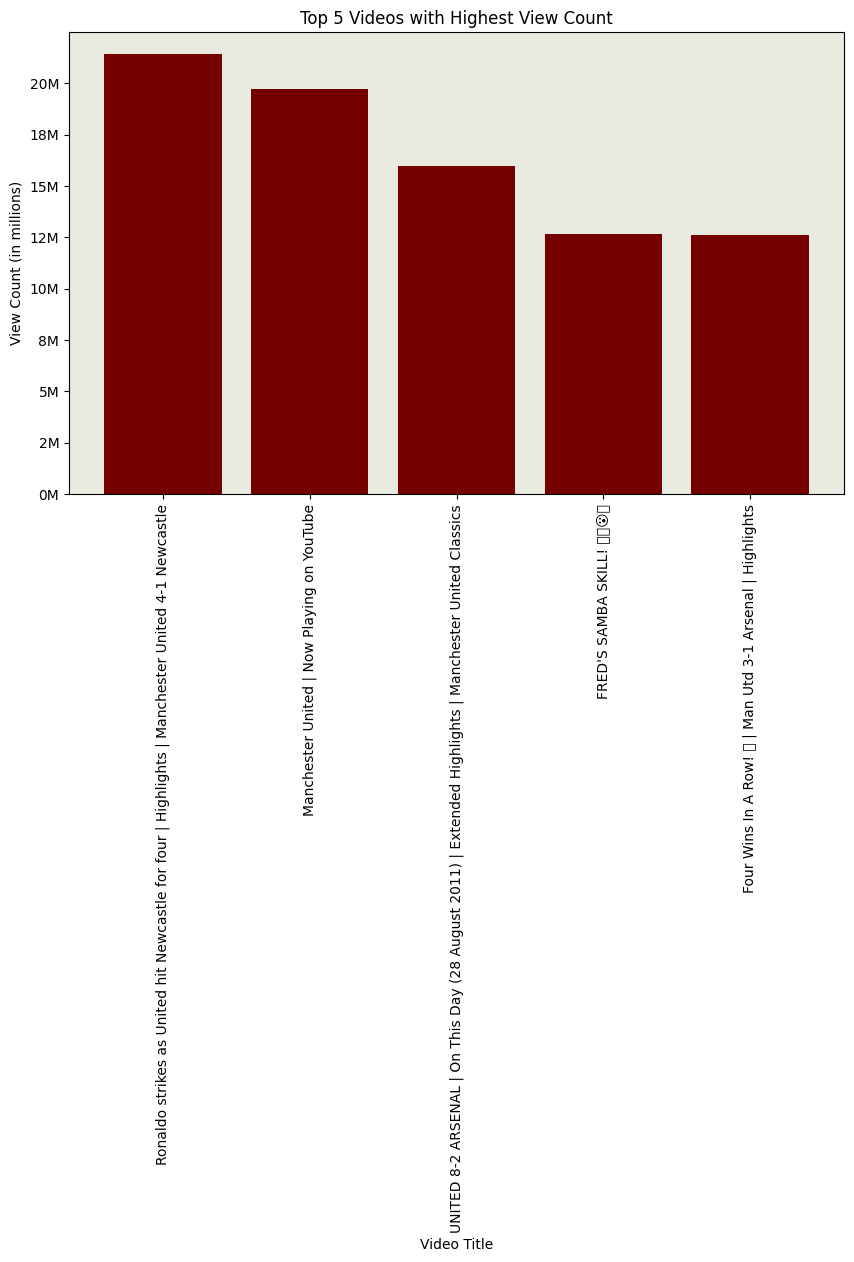

In [30]:
# Sort the DataFrame by 'viewCount' in descending order, take the top 5 videos
top_5_videos = video_df.sort_values(by='viewCount', ascending=False).head(5)

# Set the color for the bars (red)
bar_color = '#750000'

# Set the color for the plot background (gray)
background_color = '#E9EAE0'

# Plot the bar chart with the specified colors
plt.figure(figsize=(10, 6))
plt.bar(top_5_videos['title'], top_5_videos['viewCount'], color=bar_color)

# Set the plot background color
plt.gca().set_facecolor(background_color)

# Format the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Video Title')
plt.ylabel('View Count (in millions)')
plt.title('Top 5 Videos with Highest View Count')
plt.xticks(rotation=90)

plt.show()

## View distribution
Based on the visualization, we can observe that a few videos have more than 10 million views, while the majority of the videos fall within the 0 to 2 million views range.

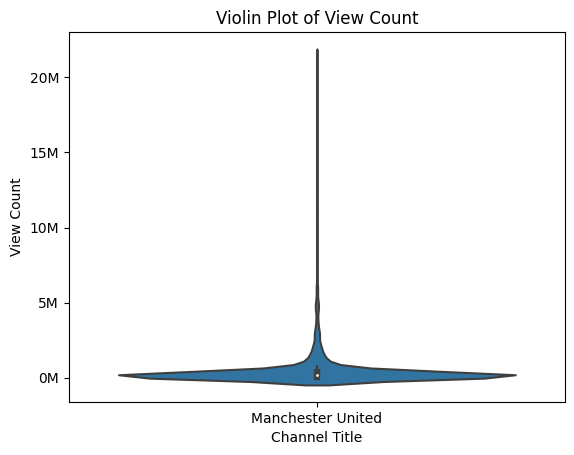

In [31]:
sns.violinplot(data=video_df, x='channelTitle', y='viewCount')

# Format the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Channel Title')
plt.ylabel('View Count')
plt.title('Violin Plot of View Count')
plt.show()

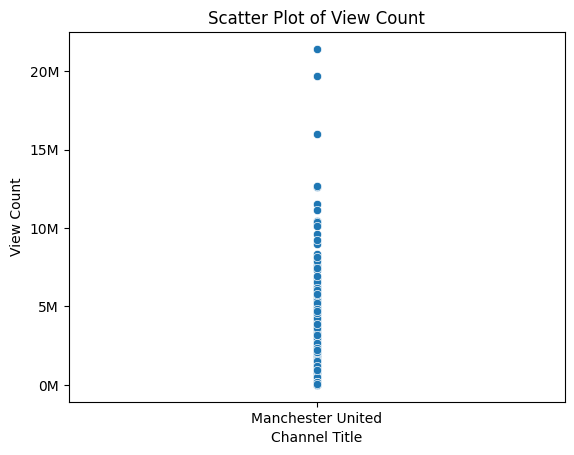

In [32]:
sns.scatterplot(data=video_df, x='channelTitle', y='viewCount')

# Format the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Channel Title')
plt.ylabel('View Count')
plt.title('Scatter Plot of View Count')
plt.show()

## View Count, Comment Count, and Like Count
<b>Does the number of likes and comments matter for a video to get more views?

To begin with, I would like to examine whether there is a correlation between the number of comments and likes and the views a video receives. Based on the plots below, we can observe  that the number of views strongly correlates with the number of comments and likes. Potentially, it's because of the YouTube algorithm. The more likes and comments a video receives, the higher the likelihood that YouTube will recommend it to other people.

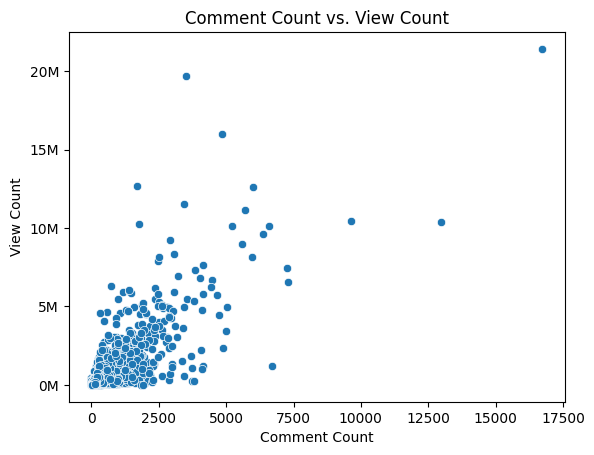

In [33]:
sns.scatterplot(data=video_df, x='commentCount', y='viewCount')

# Format the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Comment Count')
plt.ylabel('View Count')
plt.title('Comment Count vs. View Count')
plt.show()

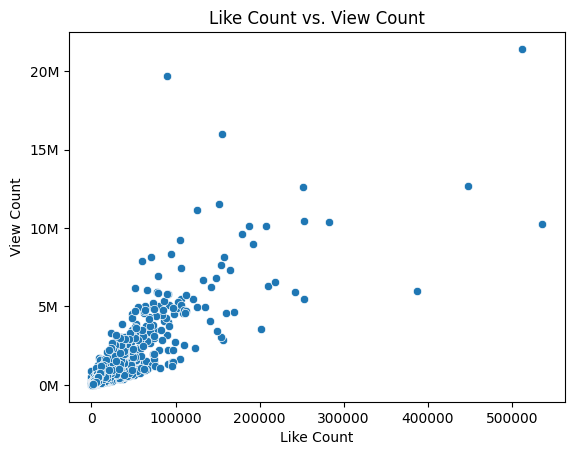

In [34]:
sns.scatterplot(data=video_df, x='likeCount', y='viewCount')

# Format the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Like Count')
plt.ylabel('View Count')
plt.title('Like Count vs. View Count')
plt.show()

## Video Duration

Based on the visualization, we can observe that the majority of the video durations fall within the 0-20 minute range. However, there are a couple of videos with durations exceeding 60 minutes, indicating that they might be livestream videos, which tend to be longer than regular videos.

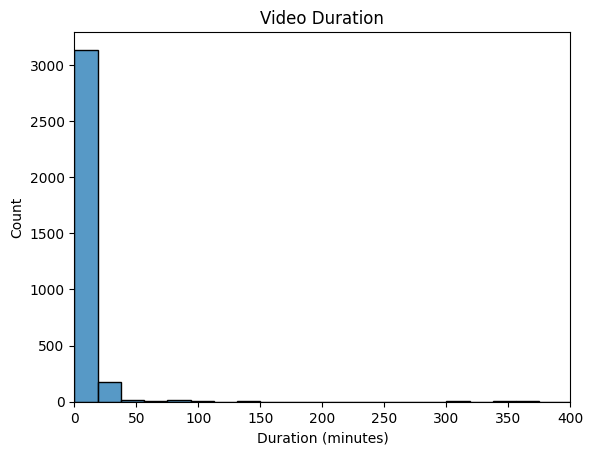

In [35]:
duration_minutes = video_df['duration'] / 60  # Convert duration to minutes
sns.histplot(data=video_df, x=duration_minutes, bins=30)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Video Duration')
plt.xlim(0, 400)  # Adjust the x-axis range as needed
plt.show()

When we dig deeper into the visualization, we can observe that the majority of the videos fall within the 0-5 minute range. Additionally, there is a significant number of videos that are less than 1 minute in duration, suggesting they might be short YouTube videos, often limited to a maximum of 60 seconds.

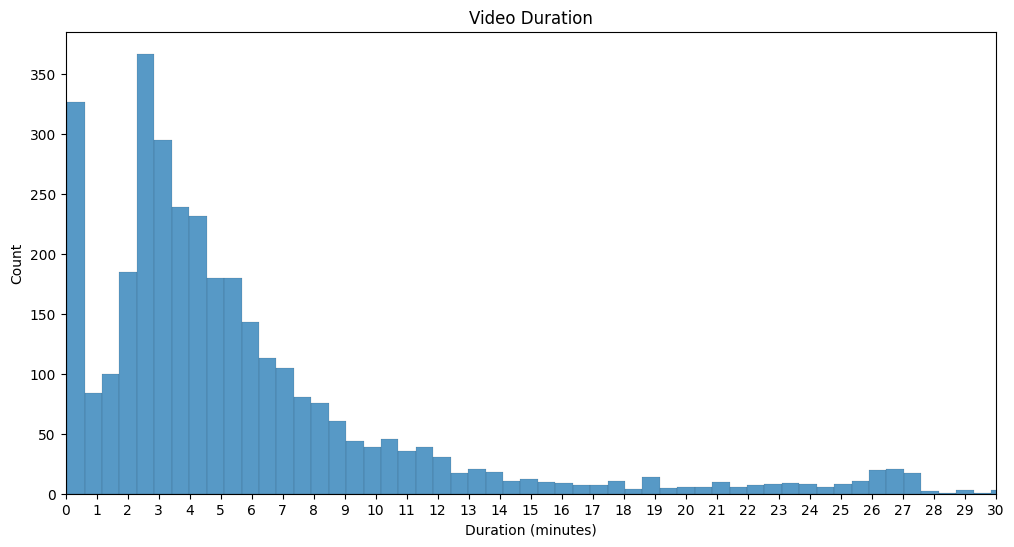

In [36]:
duration_minutes = video_df['duration'] / 60  # Convert duration to minutes

# Set the figure size
plt.figure(figsize=(12, 6))

sns.histplot(data=video_df, x=duration_minutes, bins=1000)
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.title('Video Duration')
plt.xlim(0, 30)  # Adjust the x-axis range as needed

# Set x-axis interval to 1
plt.xticks(range(0, 31, 1))

plt.show()

<b>Does the duration of a video matter for it to receive more views?
    
Based on the visualization, videos with longer durations are likely to have fewer views than videos with shorter durations. Therefore, the answer to the question would be yes, it does matter. People tend to watch shorter videos rather than longer ones on YouTube.

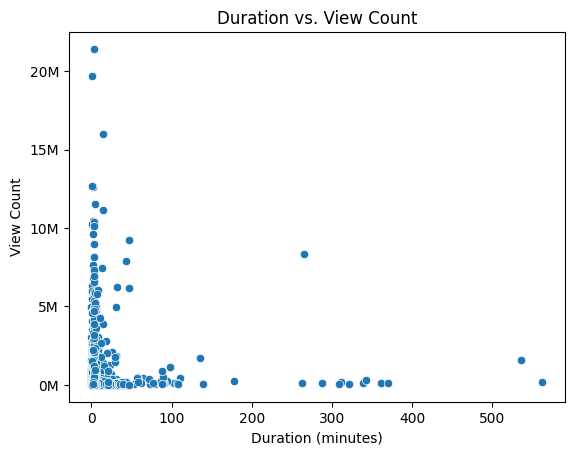

In [37]:
video_df['duration_minutes'] = video_df['duration'] / 60  # Convert duration to minutes

sns.scatterplot(data=video_df, x='duration_minutes', y='viewCount')

# Format the y-axis labels
formatter = ticker.FuncFormatter(lambda x, pos: f'{x/1e6:.0f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.xlabel('Duration (minutes)')
plt.ylabel('View Count')
plt.title('Duration vs. View Count')
plt.show()

### Wordcloud for words in title

I'm interested in identifying the most frequently used terms in video titles that have received over 1 million views. I will create a wordcloud based on these common words. To accomplish this, we need to remove stopwords such as 'you,' 'I,' 'the,' etc., as they don't contribute significantly to the meaning of the title.

Here is a list of a few words that potentially impact video views:
- Highlights : People enjoy watching match highlights as they provide a summary of the entire match in a shorter duration.
- Premier League : Currently, the Premier League is considered the best league in the world. Therefore, it is not surprising that videos with this keyword receive more views.
- Win : People tend to watch their team winning instead of losing. Therefore, it is not surprising.
- Cristiano Ronaldo : Ronaldo is the most famous footballer in the world, so it's no surprise that his name attracts more video views.
- Liverpool : Liverpool is Manchester United's biggest rival, so their matches will always attract more video views.

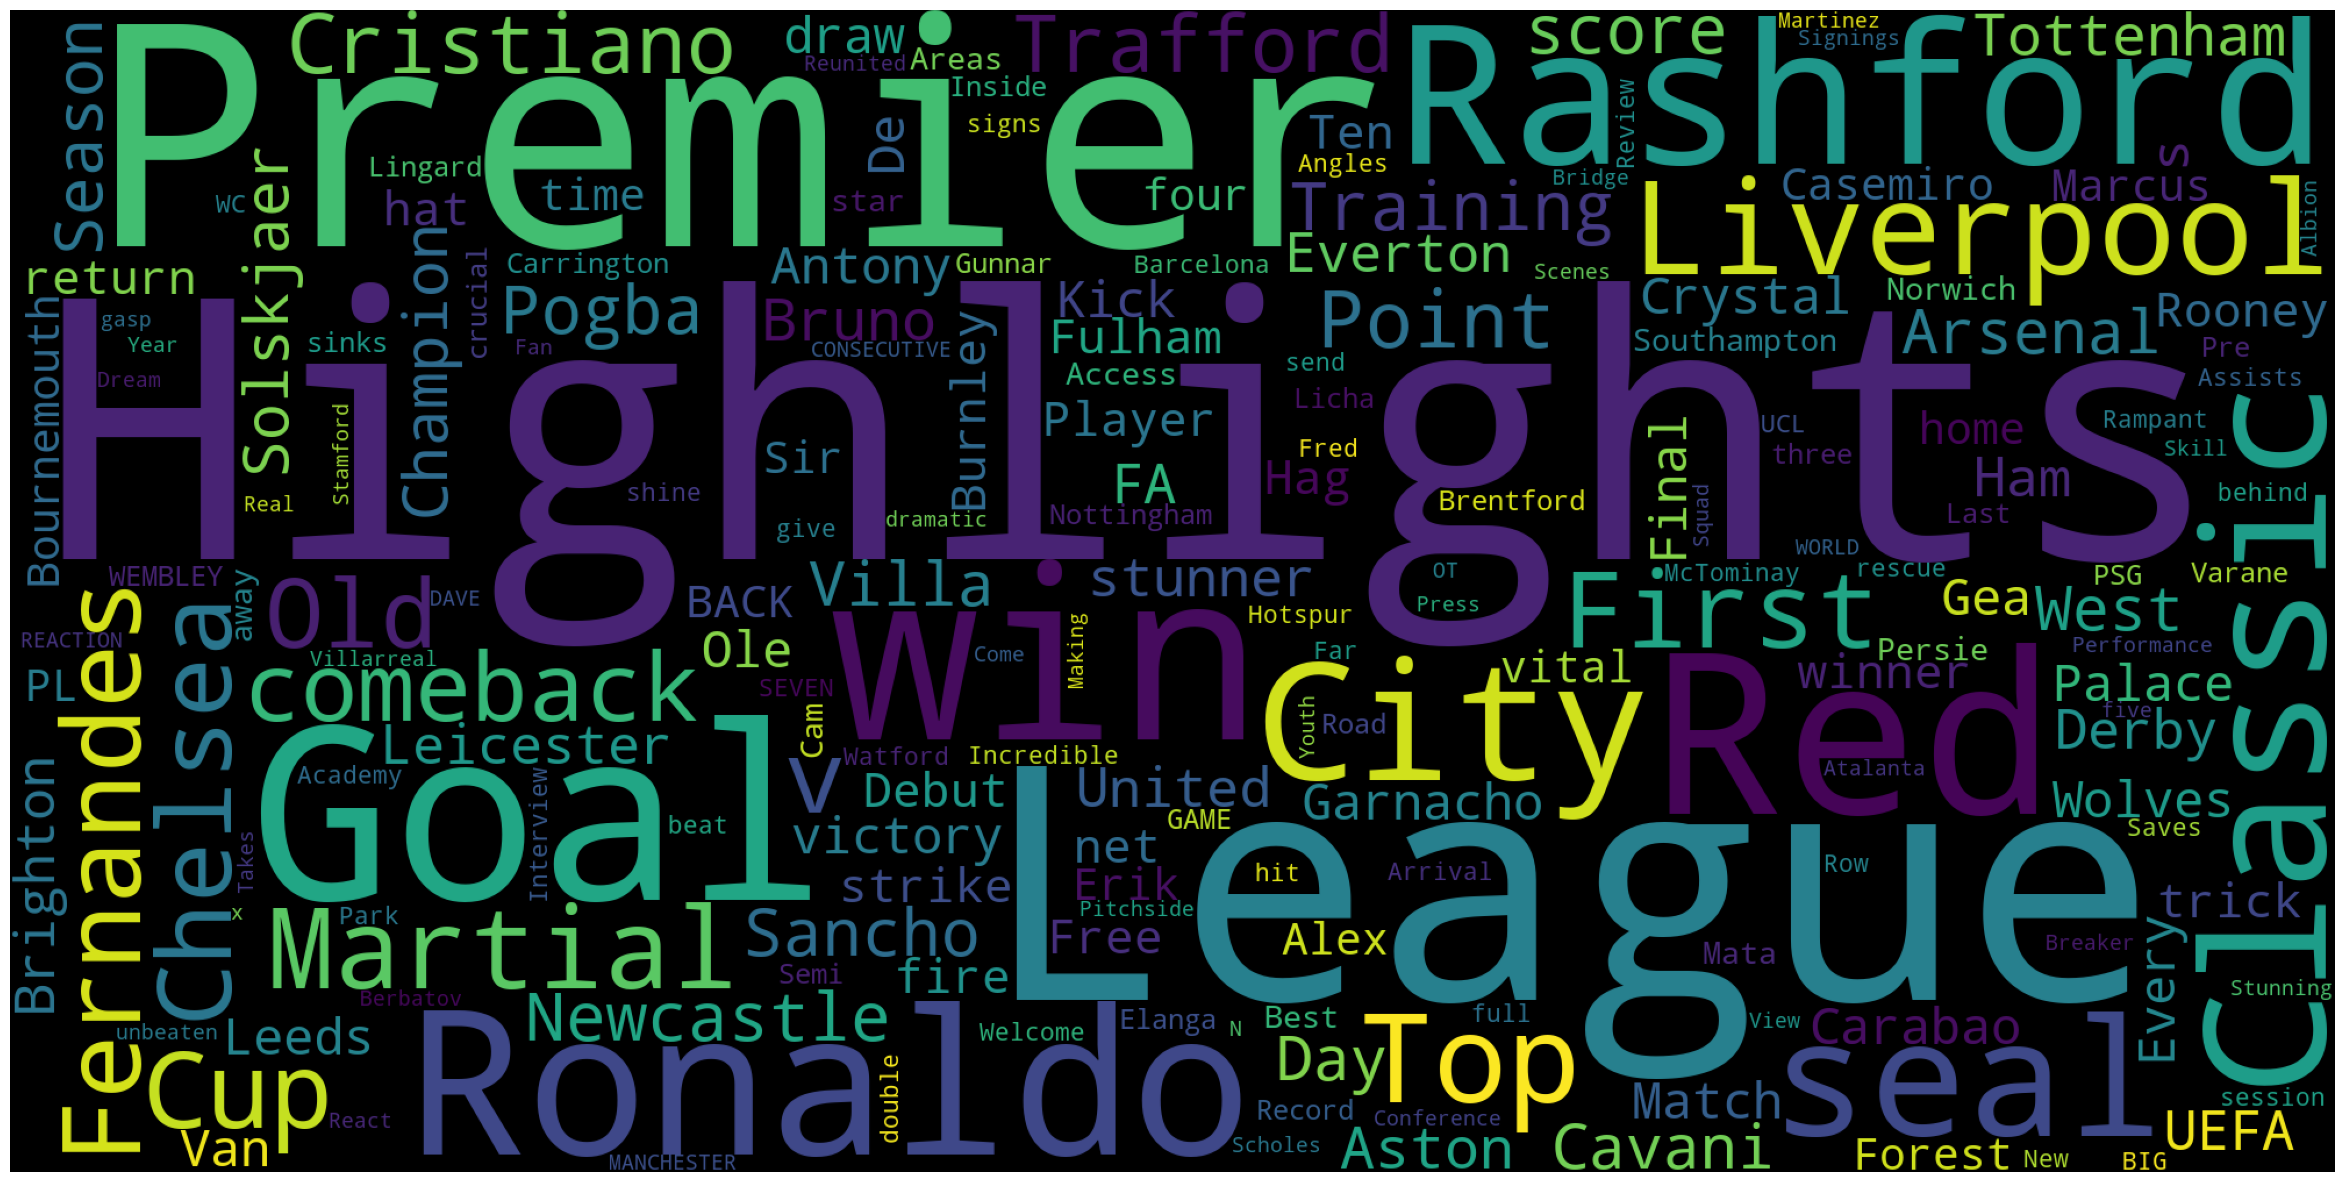

In [38]:
stop_words = set(stopwords.words('english'))
additional_stop_words = ['Manchester', 'United', 'Man', 'Utd']
stop_words.update(additional_stop_words)

# Filter videos with more than 1 million views
popular_videos_df = video_df[video_df['viewCount'] > 1000000].copy()

# Apply stop words removal and create a list of all words
popular_videos_df['title_no_stopwords'] = popular_videos_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words = list([a for b in popular_videos_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud) 
    plt.axis("off");

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black', 
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)